<a href="https://colab.research.google.com/github/Towhid-Alam/Big-Data/blob/main/21_Lab_Evaluation_2(Part_2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn
from sklearn import preprocessing
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report
%matplotlib inline

In [5]:
df = pd.read_csv('/content/emails.csv')

In [6]:
df

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1
...,...,...
5723,Subject: re : research and development charges...,0
5724,"Subject: re : receipts from visit jim , than...",0
5725,Subject: re : enron case study update wow ! a...,0
5726,"Subject: re : interest david , please , call...",0


In [7]:
df.shape

(5728, 2)

In [8]:
df['spam'].value_counts()

0    4360
1    1368
Name: spam, dtype: int64

<Axes: xlabel='spam', ylabel='count'>

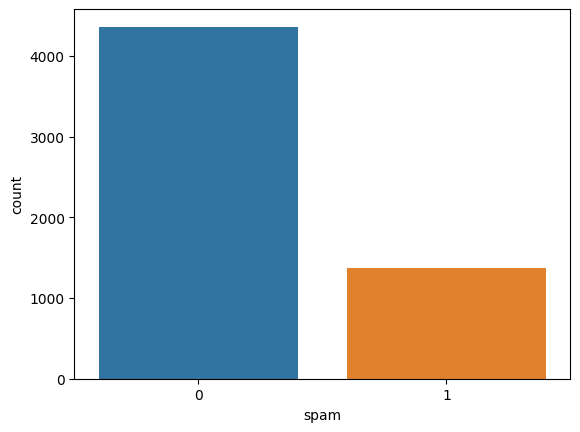

In [9]:
seaborn.countplot(x='spam',data=df)

In [10]:
df.isnull().sum()

text    0
spam    0
dtype: int64

In [11]:
X= df.text.values
y= df.spam.values

In [12]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()
X_vectorized=cv.fit_transform(X)
X_vectorized.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [4, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_vectorized,y,test_size=0.2,random_state=42)

In [14]:
from sklearn.linear_model import LogisticRegression
logr = LogisticRegression()
logr.fit(X_train,y_train)
y_pred = logr.predict(X_test)

print("Test data accuracy:",accuracy_score(y_test, y_pred))

Test data accuracy: 0.9886561954624782


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


 # Cross Validation

In [15]:
from sklearn.model_selection import StratifiedKFold, cross_val_score

In [16]:
#Stratified KFold is used for imbalanced data

logr2=LogisticRegression()
score=cross_val_score(logr2,X,y,cv= StratifiedKFold(5))

print("Cross Validation Scores are {}".format(score))
print("Average Cross Validation (Test data accuracy): {}".format(score.mean()))


ValueError: ignored